In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler


plt.rcParams.update({
    # Figure
    "figure.figsize": (10, 6),  # Taille par défaut de la figure (largeur, hauteur en pouces)
    "figure.dpi": 100,  # Résolution en points par pouce
    "figure.facecolor": (0, 0, 0, 1),  # Fond de la figure : noir pur
    "figure.edgecolor": "white",  # Bordure de la figure en blanc
    "figure.titlesize": 20,  # Taille de la police pour le titre principal
    "figure.titleweight": "bold",  # Style de la police pour le titre principal : gras

    # Axes
    "axes.facecolor": (0, 0, 0, 1),  # Fond des axes : noir pur
    "axes.edgecolor": "white",  # Bordure des axes en blanc
    "axes.linewidth": 2,  # Épaisseur des bordures des axes
    "axes.titlesize": 16,  # Taille de la police des titres des axes
    "axes.titleweight": "bold",  # Style de la police pour les titres des axes : gras
    "axes.labelsize": 14,  # Taille de la police des étiquettes des axes
    "axes.labelweight": "medium",  # Style de la police des étiquettes : intermédiaire
    "axes.labelcolor": "white",  # Couleur des étiquettes des axes
    "axes.prop_cycle": cycler(color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]),  # Cycle des couleurs pour les lignes
    "axes.grid": True,  # Activer la grille
    "axes.grid.axis": "both",  # Grille pour les deux axes (x et y)
    "axes.grid.which": "major",  # Grille pour les ticks principaux
    "grid.color": "gray",  # Couleur des lignes de la grille
    "grid.linewidth": 0.5,  # Épaisseur des lignes de la grille
    "grid.alpha": 0.6,  # Transparence des lignes de la grille

    # Ticks (Graduations)
    "xtick.color": "white",  # Couleur des ticks sur l'axe x
    "ytick.color": "white",  # Couleur des ticks sur l'axe y
    "xtick.labelsize": 16,  # Taille de la police des ticks sur l'axe x
    "ytick.labelsize": 16,  # Taille de la police des ticks sur l'axe y
    "xtick.direction": "in",  # Ticks pointant vers l'intérieur sur l'axe x
    "ytick.direction": "in",  # Ticks pointant vers l'intérieur sur l'axe y
    "xtick.major.size": 8,  # Longueur des ticks principaux sur l'axe x
    "ytick.major.size": 8,  # Longueur des ticks principaux sur l'axe y
    "xtick.minor.size": 4,  # Longueur des ticks secondaires sur l'axe x
    "ytick.minor.size": 4,  # Longueur des ticks secondaires sur l'axe y
    "xtick.major.width": 1.5,  # Épaisseur des ticks principaux sur l'axe x
    "ytick.major.width": 1.5,  # Épaisseur des ticks principaux sur l'axe y

    # Lignes et marqueurs
    # "lines.linewidth": 2,  # Épaisseur par défaut des lignes
    # "lines.linestyle": "-",  # Style par défaut des lignes continues
    # "lines.color": "#1f77b4",  # Couleur par défaut des lignes
    # "lines.marker": "o",  # Marqueur par défaut : cercle
    # "lines.markersize": 8,  # Taille par défaut des marqueurs
    # "lines.markeredgewidth": 1.5,  # Épaisseur du bord des marqueurs
    # "lines.markerfacecolor": "blue",  # Couleur du remplissage des marqueurs

    # Polices
    "font.size": 12,  # Taille globale de la police
    "font.family": "sans-serif",  # Famille de polices par défaut
    "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],  # Liste des polices sans-serif préférées
    "text.color": "white",  # Couleur du texte

    # Légendes
    "legend.loc": "upper right",  # Emplacement par défaut de la légende
    "legend.fontsize": 12,  # Taille de la police pour la légende
    "legend.frameon": True,  # Activer le cadre autour de la légende
    "legend.framealpha": 0.8,  # Transparence du cadre de la légende
    "legend.edgecolor": "white",  # Couleur de la bordure de la légende
    "legend.facecolor": (0.2, 0.2, 0.2, 0.9),  # Fond de la légende : gris foncé semi-transparent

    # Sauvegarde des graphiques
    "savefig.dpi": 300,  # Résolution par défaut pour les fichiers sauvegardés
    "savefig.format": "png",  # Format par défaut pour les fichiers sauvegardés
    "savefig.facecolor": (0, 0, 0, 1),  # Fond des figures sauvegardées : noir pur
    "savefig.edgecolor": "none",  # Pas de bordure pour les figures sauvegardées
    "savefig.transparent": True,  # Fond transparent pour les fichiers sauvegardés

    # Couleurs et cycles
    "image.cmap": "viridis",  # Palette par défaut pour les images
})


In [26]:


def read_and_concatenate_hdf5_by_keyword(folder_path: str, keyword: str) -> pd.DataFrame:
    """
    Lit tous les fichiers HDF5 contenant un mot-clé dans leur nom,
    puis concatène les données en une seule DataFrame.

    Parameters:
    - folder_path (str): Chemin du dossier contenant les fichiers HDF5.
    - keyword (str): Mot-clé à rechercher dans les noms des fichiers HDF5.

    Returns:
    - DATA (pd.DataFrame): DataFrame contenant les données concaténées.
    """
    # Liste des fichiers HDF5 contenant le mot-clé
    hdf5_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
                  if f.endswith(".hdf5") and keyword in f]

    if not hdf5_files:
        raise FileNotFoundError(f"Aucun fichier HDF5 contenant '{keyword}' trouvé dans le dossier {folder_path}.")

    print(f"Fichiers trouvés : {hdf5_files}")

    # Lire et concaténer les fichiers
    data_frames = []
    for file in hdf5_files:
        try:
            print(f"Lecture du fichier : {file}")
            df = pd.read_hdf(file)
            data_frames.append(df)
        except Exception as e:
            print(f"Erreur lors de la lecture du fichier {file} : {e}")

    # Concaténer tous les DataFrames en une seule DataFrame
    if data_frames:
        DATA = pd.concat(data_frames, ignore_index=True)
        print(f"Concaténation terminée. Nombre total de lignes : {len(DATA)}")
        return DATA
    else:
        raise ValueError("Aucune donnée n'a pu être lue à partir des fichiers HDF5.")

In [19]:
# Utilisation
folder_path = "/Users/souchaud/Desktop/Analyses/tables_resultats"
all_metrics_df = read_and_concatenate_hdf5_by_keyword(folder_path, keyword="all_metrics")
metrics_df = read_and_concatenate_hdf5_by_keyword(folder_path, keyword="x_metrics")
DATA = read_and_concatenate_hdf5_by_keyword(folder_path, keyword="data")

Fichiers trouvés : ['/Users/souchaud/Desktop/Analyses/tables_resultats/CytoOne_SorC_10x_all_metrics.hdf5', '/Users/souchaud/Desktop/Analyses/tables_resultats/CytoOne_HL5_10x_all_metrics.hdf5']
Lecture du fichier : /Users/souchaud/Desktop/Analyses/tables_resultats/CytoOne_SorC_10x_all_metrics.hdf5
Lecture du fichier : /Users/souchaud/Desktop/Analyses/tables_resultats/CytoOne_HL5_10x_all_metrics.hdf5
Concaténation terminée. Nombre total de lignes : 73
Fichiers trouvés : ['/Users/souchaud/Desktop/Analyses/tables_resultats/CytoOne_SorC_10x_metrics.hdf5', '/Users/souchaud/Desktop/Analyses/tables_resultats/CytoOne_HL5_10x_metrics.hdf5']
Lecture du fichier : /Users/souchaud/Desktop/Analyses/tables_resultats/CytoOne_SorC_10x_metrics.hdf5
Lecture du fichier : /Users/souchaud/Desktop/Analyses/tables_resultats/CytoOne_HL5_10x_metrics.hdf5
Concaténation terminée. Nombre total de lignes : 10791
Fichiers trouvés : ['/Users/souchaud/Desktop/Analyses/tables_resultats/CytoOne_HL5_10x_data.hdf5', '/User

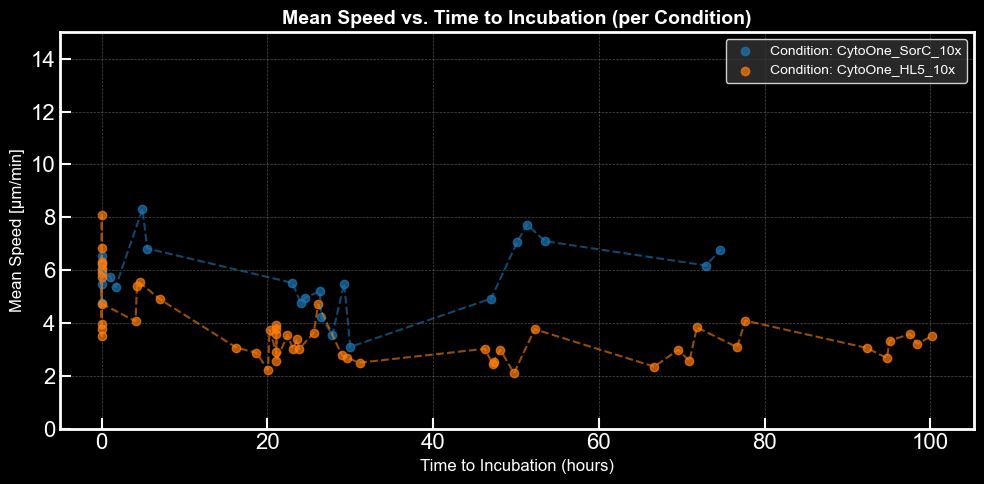

Plot saved to /Users/souchaud/Desktop/Analyses/Mean_Speed_vs_Time_by_Condition.png


In [27]:
def plot_median_velocity_vs_time(all_metrics_df, path_save_pic, xlim: list = None):
    """
    Plot median velocities as a function of incubation time for each condition in all_metrics_df.

    Parameters:
    - all_metrics_df (DataFrame): DataFrame containing aggregated metrics for each experiment.
                                  Must include columns 'time to incubation (hours)', 'mean_speed [um/min]', and 'condition'.
    - path_save_pic (str): Path where the plot will be saved.
    - xlim (list, optional): Limit for the x-axis.

    Returns:
    None
    """
    # Vérifier la présence des colonnes nécessaires
    required_columns = ['time to incubation (hours)', 'mean_speed [um/min]', 'condition']
    for col in required_columns:
        if col not in all_metrics_df.columns:
            raise ValueError(f"Colonne manquante dans all_metrics_df : {col}")
    
    # Préparer le graphique
    plt.figure(figsize=(10, 5))

    # Itérer sur chaque condition
    conditions = all_metrics_df['condition'].unique()
    for condition in conditions:
        condition_data = all_metrics_df[all_metrics_df['condition'] == condition].sort_values(by='time to incubation (hours)')
        x = condition_data['time to incubation (hours)']
        y = condition_data['mean_speed [um/min]']
        
        # Tracé des points et de la courbe pour chaque condition
        plt.scatter(x, y, label=f'Condition: {condition}', alpha=0.7)
        plt.plot(x, y, linestyle='--', alpha=0.6)

    # Ajouter des labels et des titres
    plt.title('Mean Speed vs. Time to Incubation (per Condition)', fontsize=14)
    plt.xlabel('Time to Incubation (hours)', fontsize=12)
    plt.ylabel('Mean Speed [μm/min]', fontsize=12)
    plt.ylim([0, 15])
    if xlim:
        plt.xlim(xlim)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=10)

    # Sauvegarder et afficher
    plt.tight_layout()
    fig_path = os.path.join(path_save_pic, 'Mean_Speed_vs_Time_by_Condition.png')
    plt.savefig(fig_path, format='png')
    plt.show()

    print(f"Plot saved to {fig_path}")

# Exemple d'appel
plot_median_velocity_vs_time(all_metrics_df, path_save_pic="/Users/souchaud/Desktop/Analyses")

In [34]:
all_metrics_df['mean_speed [um/min]'].median()
diti = all_metrics_df[all_metrics_df['condition']=='CytoOne_SorC_10x']
diti['mean_speed [um/min]'].median()

5.501915243606804

In [35]:
all_metrics_df[all_metrics_df['condition']=='CytoOne_HL5_10x']['mean_speed [um/min]'].median()

3.5101050662988484